In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
#df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
26214,Thiruvananthapuram,2020-04-27,14.13,34.27,5.60,8.98,12.48,5.65,0.49,5.50,42.41,NaN,NaN,NaN,63.0,Satisfactory
26215,Thiruvananthapuram,2020-04-28,23.84,44.32,6.27,10.01,13.80,5.73,0.44,5.62,44.55,NaN,NaN,NaN,60.0,Satisfactory
26216,Thiruvananthapuram,2020-04-29,18.54,34.48,6.17,9.67,13.35,5.93,0.51,5.52,38.97,NaN,NaN,NaN,57.0,Satisfactory
26217,Thiruvananthapuram,2020-04-30,20.57,48.19,6.28,9.52,13.56,5.84,0.46,5.32,39.23,NaN,NaN,NaN,57.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [5]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [6]:
df.shape

(26219, 16)

In [7]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
std,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['AQI_Bucket','PM10'], axis = 1)

In [10]:
df.isnull().sum()

City       0
Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df = df.sort_index()


In [13]:
df.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,Ahmedabad,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,Ahmedabad,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,Ahmedabad,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,Ahmedabad,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [14]:
df['City'].value_counts()

Bengaluru             1948
Chennai               1948
Delhi                 1948
Ahmedabad             1948
Lucknow               1948
Mumbai                1948
Hyderabad             1945
Patna                 1797
Gurugram              1618
Amritsar              1160
Jorapokhar            1108
Jaipur                1053
Thiruvananthapuram    1051
Amaravati              890
Brajrajnagar           877
Talcher                864
Kolkata                753
Guwahati               441
Shillong               249
Chandigarh             243
Bhopal                 228
Kochi                  101
Ernakulam              101
Aizawl                  52
Name: City, dtype: int64

# Forecasting for kolkata


before corona

In [0]:
df_kolkata= df[df['City'] == 'Kolkata']
df_kolkata = df_kolkata.drop('City' , axis = 1)
df_kolkata.set_index('Date', inplace=True)


In [16]:
df_kolkata.shape

(753, 12)

In [17]:
df_kolkata.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2018-04-10,34.38,18.232528,40.97,33.657667,2.52,1.00,25.460000,34.374248,3.300132,9.029794,3.155895,175.840908
2018-04-11,29.00,3.260000,34.03,45.290000,3.59,0.98,10.320000,30.990000,4.640000,0.880000,3.155895,73.000000
2018-04-12,21.70,3.490000,39.49,42.540000,3.77,0.73,14.988734,43.720000,5.330000,1.760000,3.155895,60.000000
2018-04-13,23.09,3.690000,33.03,36.720000,3.88,0.98,14.988734,41.650000,6.780000,2.230000,3.155895,74.000000
2018-04-14,21.56,2.810000,26.62,29.430000,4.22,1.00,14.988734,44.070000,5.090000,2.330000,3.155895,83.000000


In [0]:
df_kolkata_before_covid = df_kolkata.loc['2016-01-01' : '2020-03-23' ]
df_kolkata_after_covid = df_kolkata.loc['2020-03-24' : ]

In [19]:
df_kolkata_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2018-04-10,34.38,18.232528,40.97,33.657667,2.52,1.00,25.460000,34.374248,3.300132,9.029794,3.155895,175.840908
2018-04-11,29.00,3.260000,34.03,45.290000,3.59,0.98,10.320000,30.990000,4.640000,0.880000,3.155895,73.000000
2018-04-12,21.70,3.490000,39.49,42.540000,3.77,0.73,14.988734,43.720000,5.330000,1.760000,3.155895,60.000000
2018-04-13,23.09,3.690000,33.03,36.720000,3.88,0.98,14.988734,41.650000,6.780000,2.230000,3.155895,74.000000
2018-04-14,21.56,2.810000,26.62,29.430000,4.22,1.00,14.988734,44.070000,5.090000,2.330000,3.155895,83.000000


In [20]:
df_kolkata_before_covid.shape

(714, 12)

In [0]:
df_kolkata_before_covid=  df_kolkata_before_covid.resample('W').mean()

In [22]:
df_kolkata_before_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2018-04-15,26.668333,5.662088,36.195000,38.859611,3.475000,0.916667,15.955823,43.114041,5.376689,3.138299,3.155895,93.473485
2018-04-22,58.604934,3.892857,29.080000,32.970000,11.025714,1.128571,14.988734,32.118571,5.010000,0.964286,3.155895,148.029220
2018-04-29,71.828907,4.212857,36.560000,40.770000,12.432857,0.408571,14.988734,36.629570,5.007143,0.604286,3.155895,175.840908
2018-05-06,71.828907,2.692857,27.974286,30.650000,10.984286,0.000000,14.988734,34.374248,4.325714,4.310000,3.155895,175.840908
2018-05-13,71.828907,3.260000,27.522857,30.781429,9.390000,0.000000,14.988734,34.374248,1.551429,3.390000,3.155895,175.840908


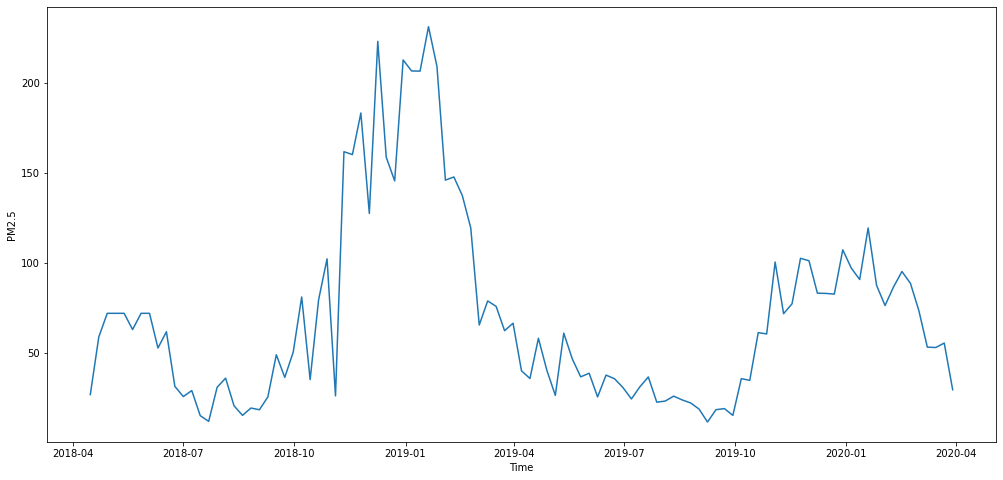

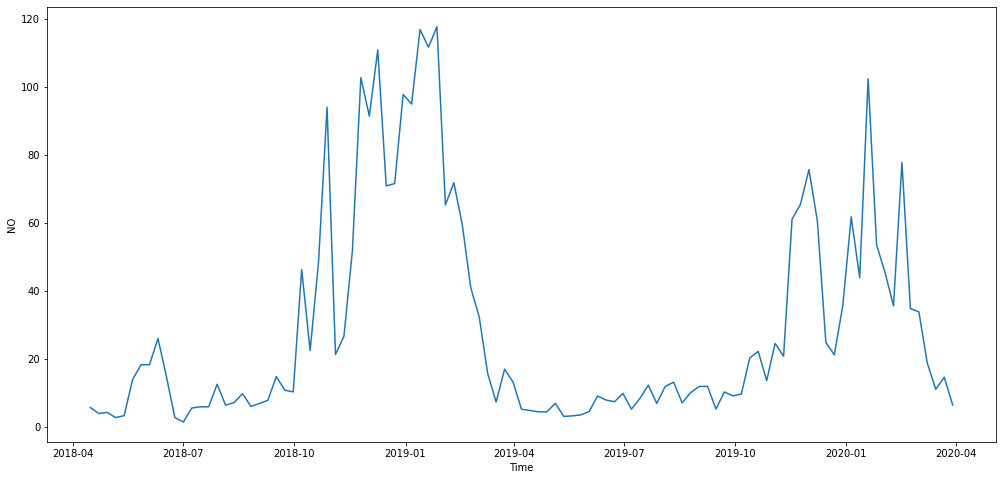

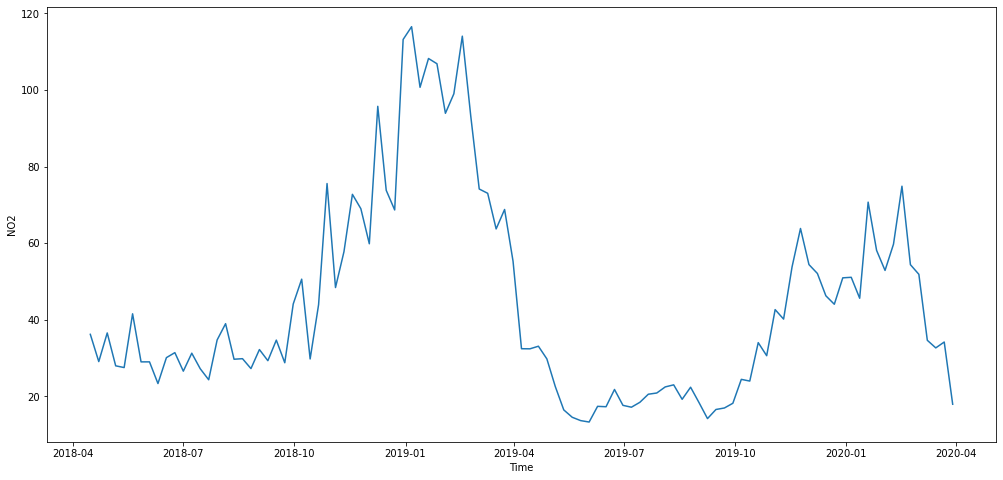

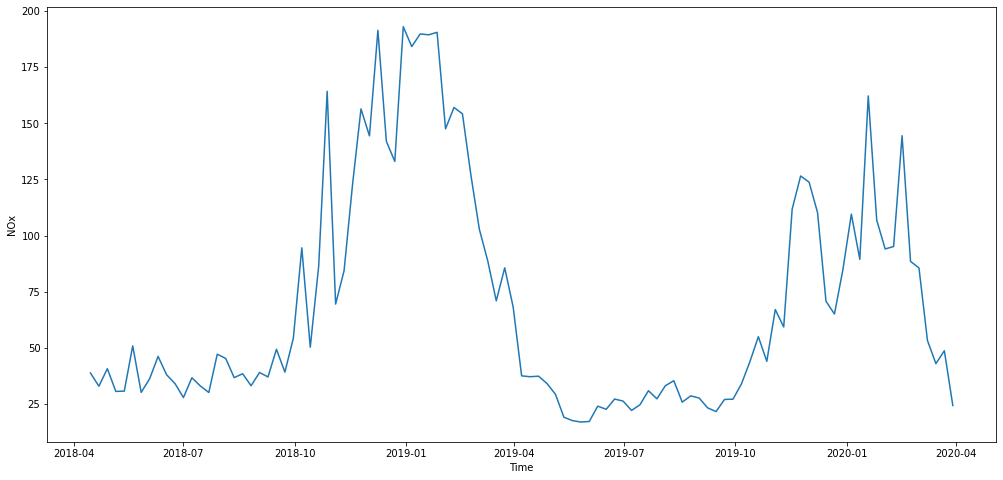

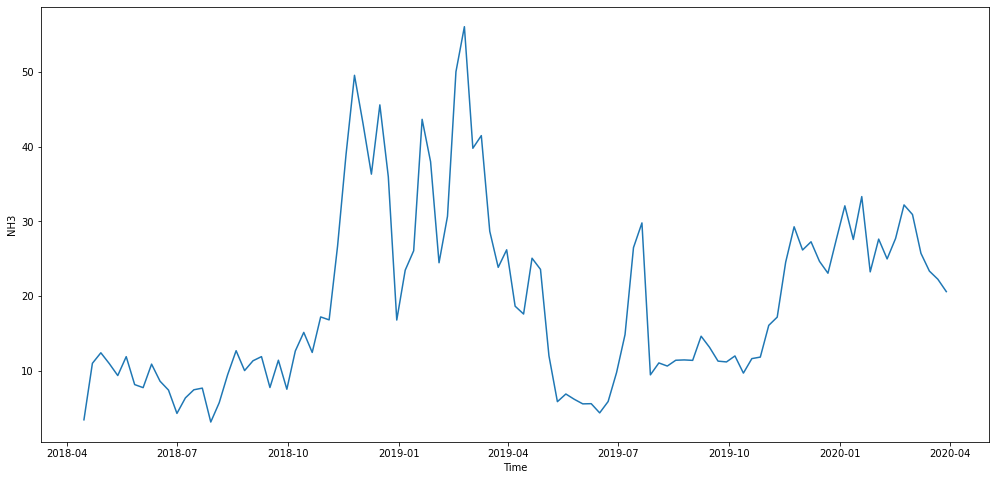

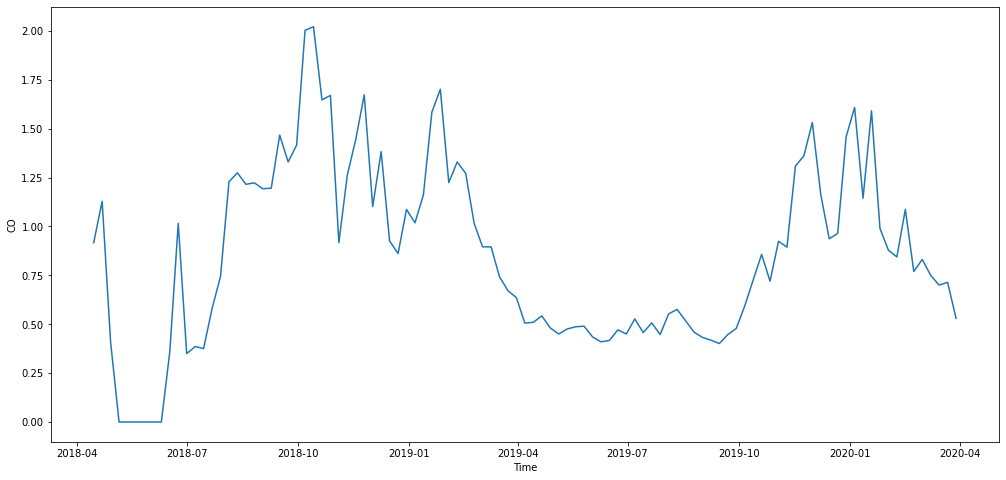

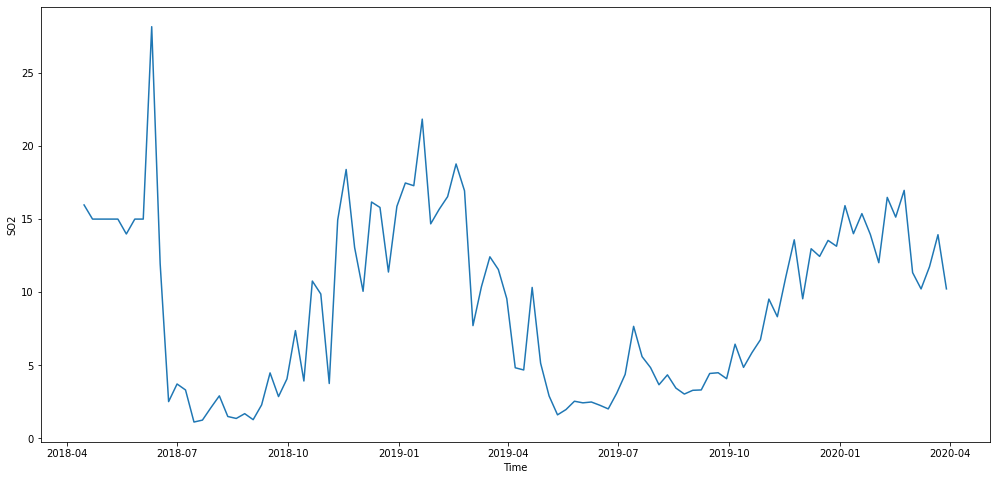

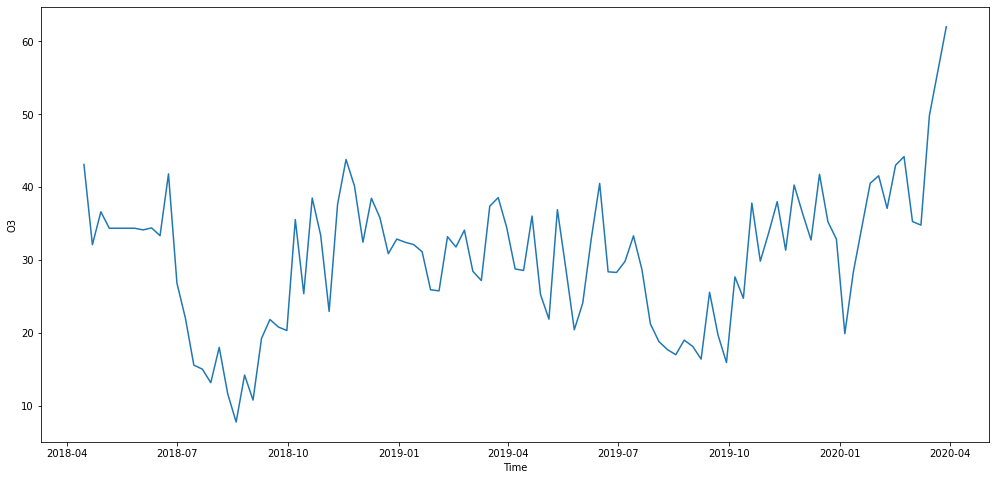

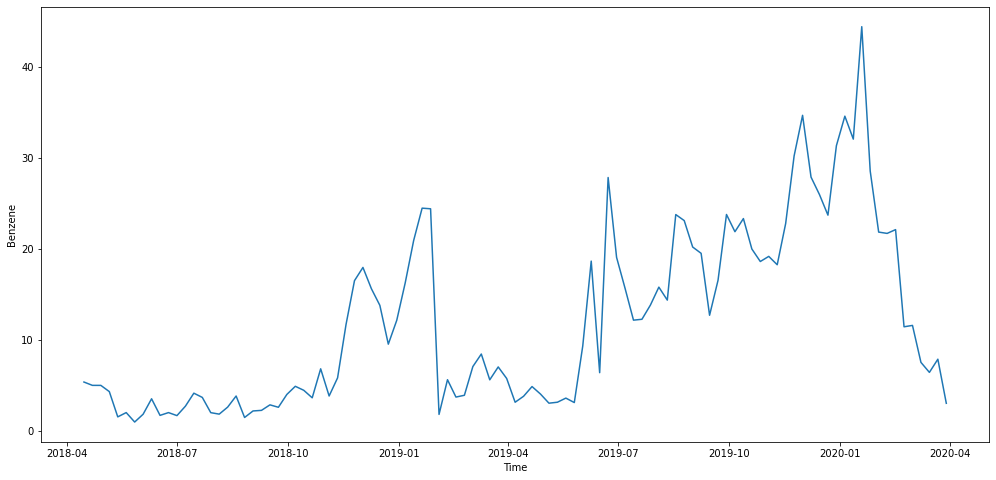

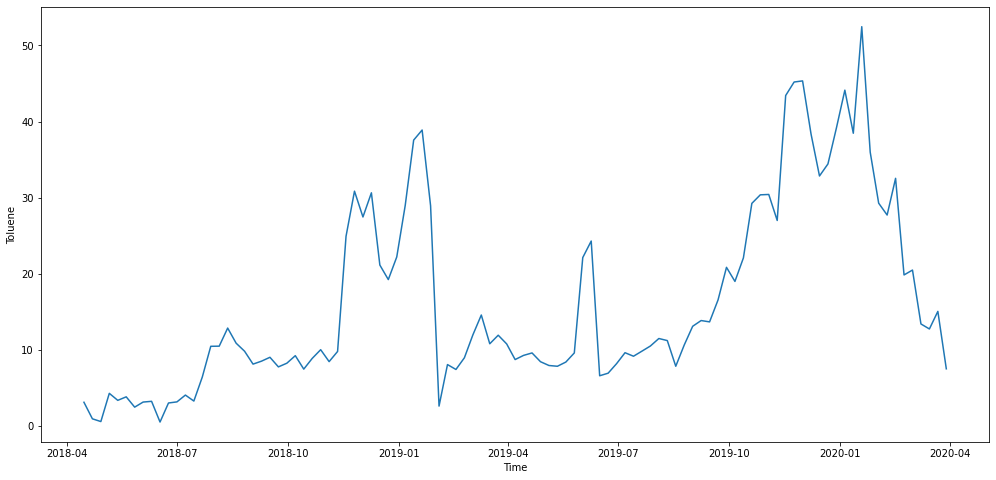

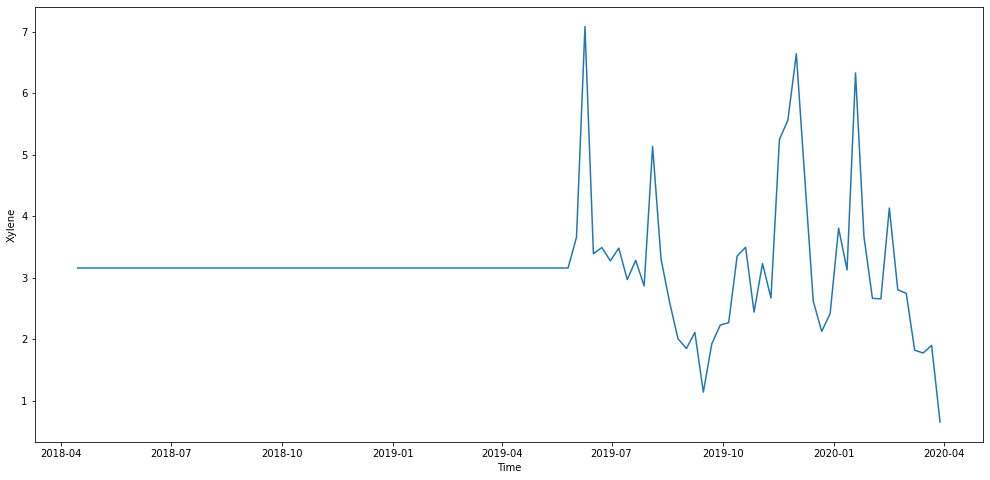

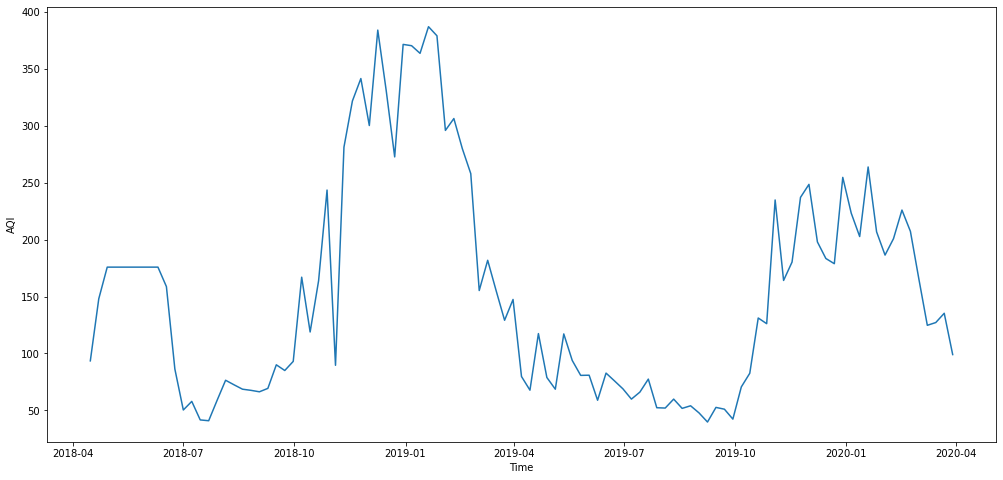

In [23]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_kolkata_before_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_kolkata_before_covid.columns:
    plot_data(col)

In [24]:
df_kolkata_before_covid = df_kolkata_before_covid.reset_index()
df_kolkata_before_covid = df_kolkata_before_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_kolkata_before_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2018-04-15,26.668333,5.662088,36.195,38.859611,3.475,0.916667,15.955823,43.114041,5.376689,3.138299,3.155895,93.473485


# Modeling on before dataset

In [0]:
train  = df_kolkata_before_covid

cols = train.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [27]:
train = train[cols]
train_y = train[['ds','y']]
train_y.head(3)

,ds,y
0,2018-04-15,93.473485
1,2018-04-22,148.029220
2,2018-04-29,175.840908


In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [0]:
m = Prophet()

In [0]:
#m.add_regressor('PM2.5')
#m.add_regressor('NO')
#m.add_regressor('NO2')
#m.add_regressor('NOx')
#m.add_regressor('NH3')
#m.add_regressor('CO')
#m.add_regressor('SO2')
#m.add_regressor('O3')
#m.add_regressor('Benzene')
#m.add_regressor('Toluene')
#m.add_regressor('Xylene')

In [31]:
m.fit(train_y)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
463,2021-03-25,170.420069,40.588895,297.515316,170.419880,170.420251,0.0,0.0,0.0,0.0,0.0,0.0,170.420069
464,2021-03-26,170.441621,49.578488,294.342075,170.441432,170.441804,0.0,0.0,0.0,0.0,0.0,0.0,170.441621
465,2021-03-27,170.463174,46.122345,295.455787,170.462984,170.463357,0.0,0.0,0.0,0.0,0.0,0.0,170.463174
466,2021-03-28,170.484726,44.142665,300.010062,170.484536,170.484910,0.0,0.0,0.0,0.0,0.0,0.0,170.484726
467,2021-03-29,170.506278,45.379397,297.902340,170.506088,170.506463,0.0,0.0,0.0,0.0,0.0,0.0,170.506278


In [33]:
train_nox = train[['ds','NOx']]
train_nox = train_nox.rename({'NOx':'y'},axis=1)
m = Prophet()
m.fit(train_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods= 365 )
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
463,2021-03-25,68.096972,4.914241,137.517120,68.074700,68.119629,0.0,0.0,0.0,0.0,0.0,0.0,68.096972
464,2021-03-26,68.095794,2.824695,135.462209,68.073442,68.118546,0.0,0.0,0.0,0.0,0.0,0.0,68.095794
465,2021-03-27,68.094617,1.620585,133.181009,68.072178,68.117458,0.0,0.0,0.0,0.0,0.0,0.0,68.094617
466,2021-03-28,68.093439,1.198508,131.291998,68.070896,68.116351,0.0,0.0,0.0,0.0,0.0,0.0,68.093439
467,2021-03-29,68.092261,4.947334,137.912037,68.069595,68.115258,0.0,0.0,0.0,0.0,0.0,0.0,68.092261


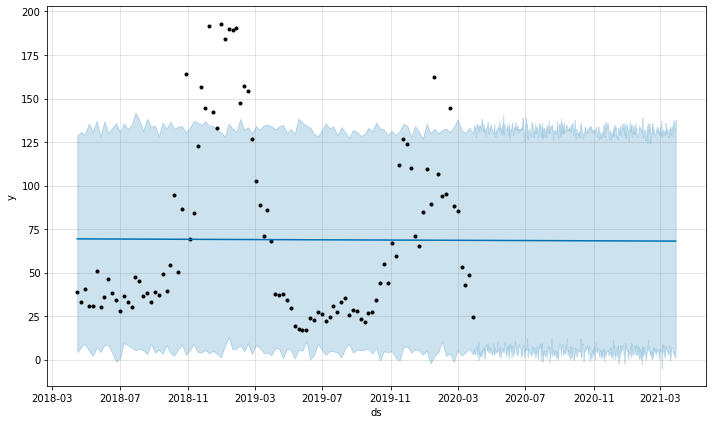

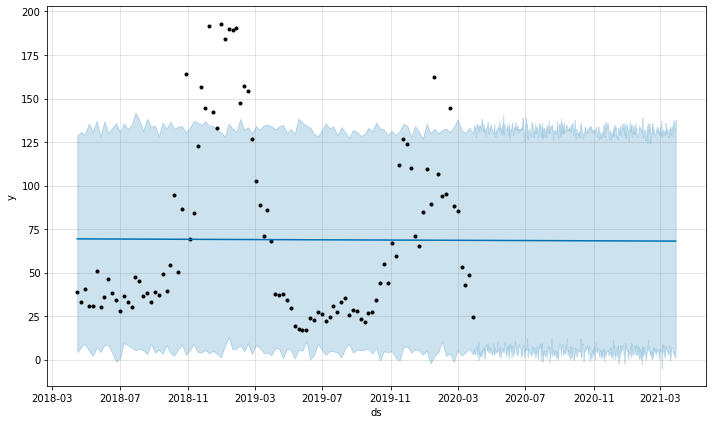

In [35]:
m.plot(forecast)

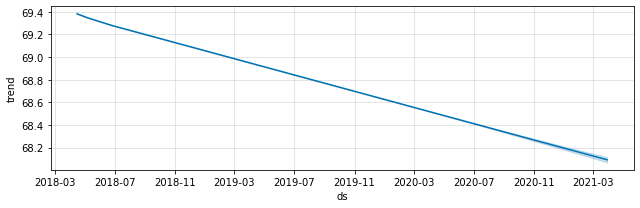

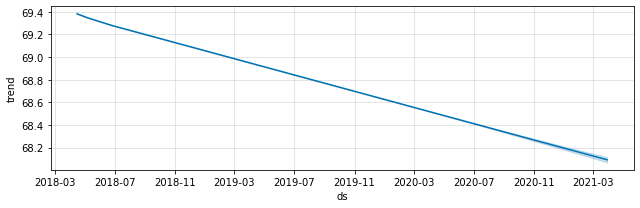

In [36]:
m.plot_components(forecast)

In [37]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(train_nox, forecast)

cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-04-15,69.382327,4.202214,128.991206,38.859611
2018-04-22,69.370824,7.243804,130.693464,32.970000
2018-04-29,69.359321,8.966404,129.376292,40.770000
2018-05-06,69.347818,5.071032,135.699908,30.650000
2018-05-13,69.338108,2.178736,130.707233,30.781429


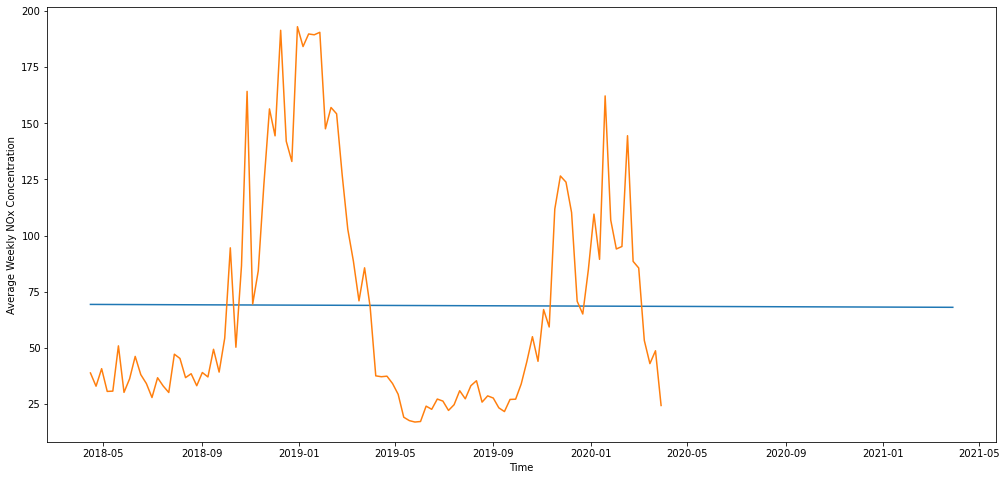

In [38]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])

plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()


# **During corona**

In [39]:
df_kolkata_after_covid.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2020-03-24,33.21,5.56,13.92,19.53,19.63,0.52,9.68,48.07,3.40,7.69,0.66,88.0
2020-03-25,53.01,5.92,15.94,21.92,19.44,0.57,12.52,44.48,4.30,9.36,1.01,96.0
2020-03-26,37.02,5.62,14.36,20.02,19.23,0.52,6.80,47.17,2.77,7.92,0.70,95.0
2020-03-27,48.10,5.25,14.86,20.16,18.61,0.55,11.62,60.57,3.68,7.67,0.74,106.0
2020-03-28,46.57,6.29,15.71,21.90,18.62,0.57,11.46,58.18,3.34,6.79,0.76,100.0


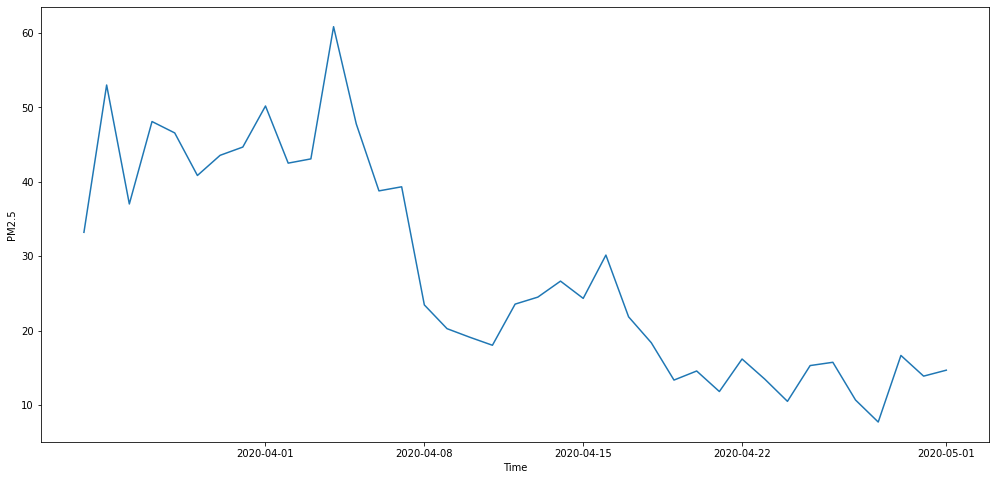

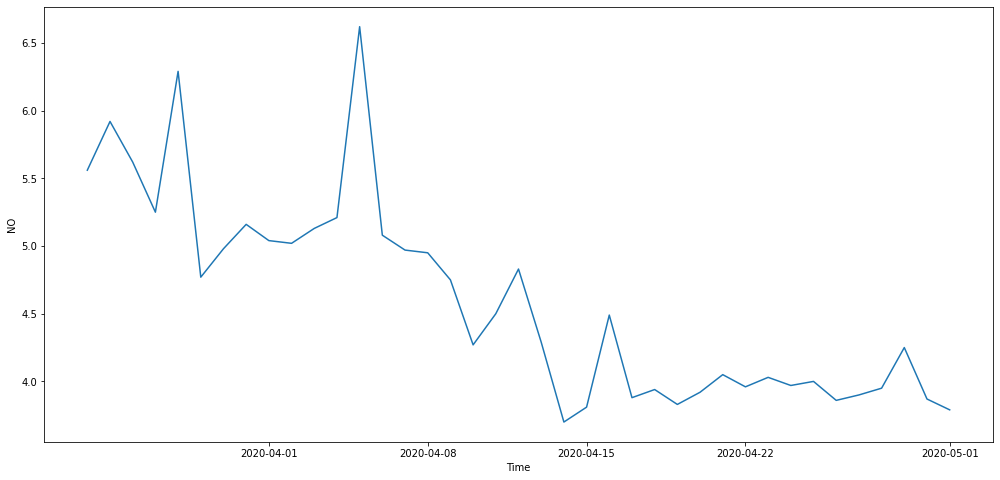

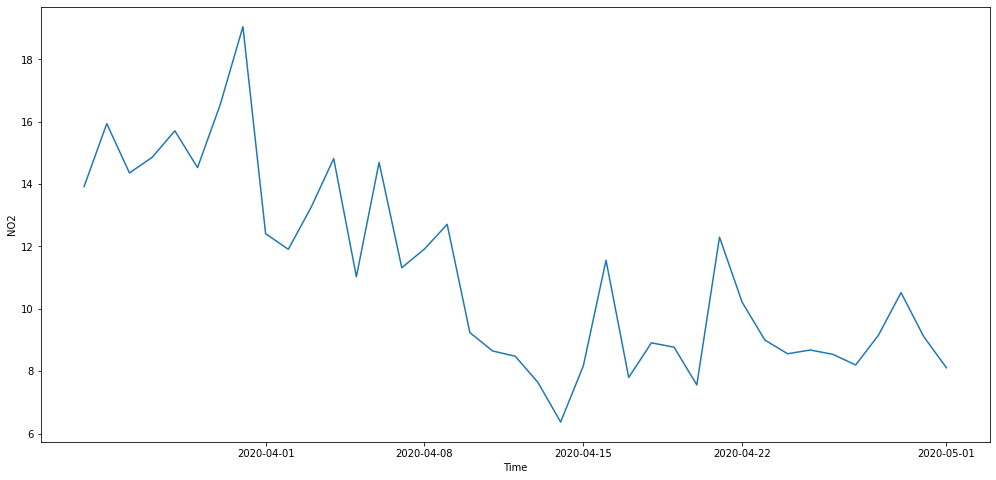

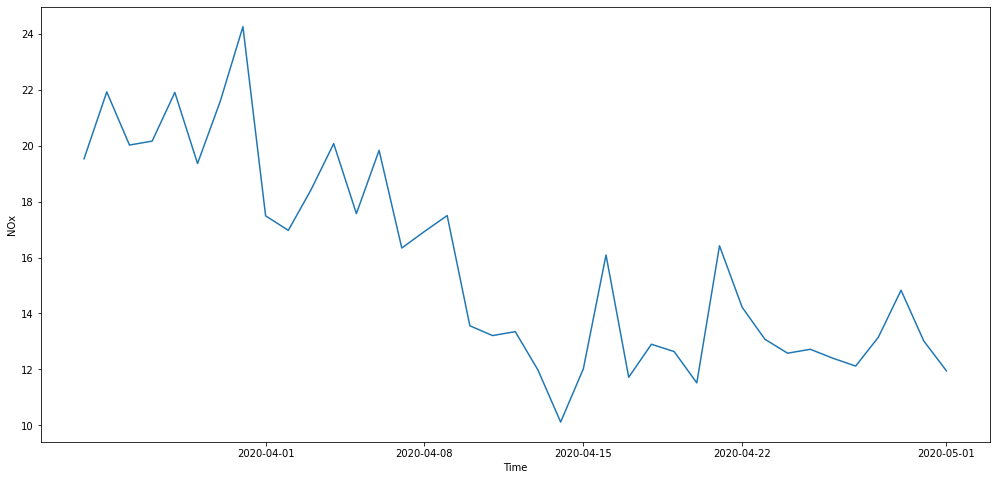

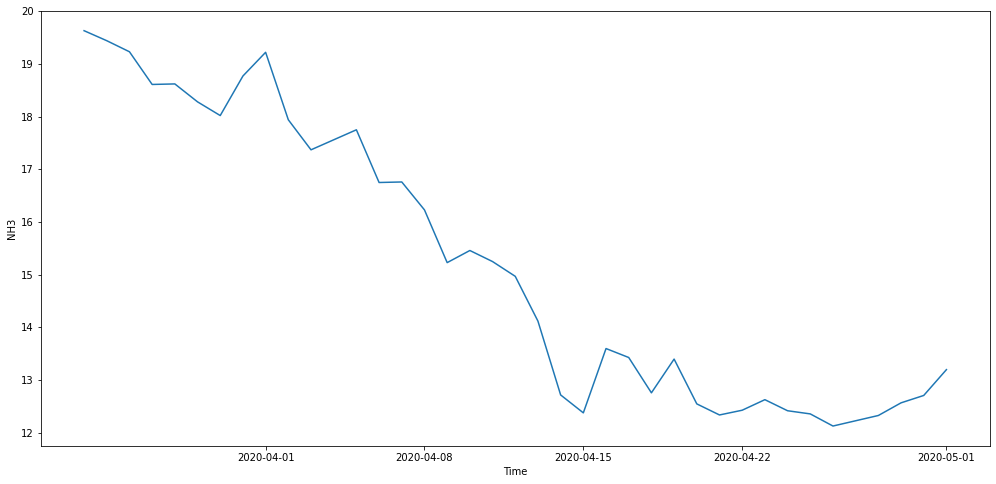

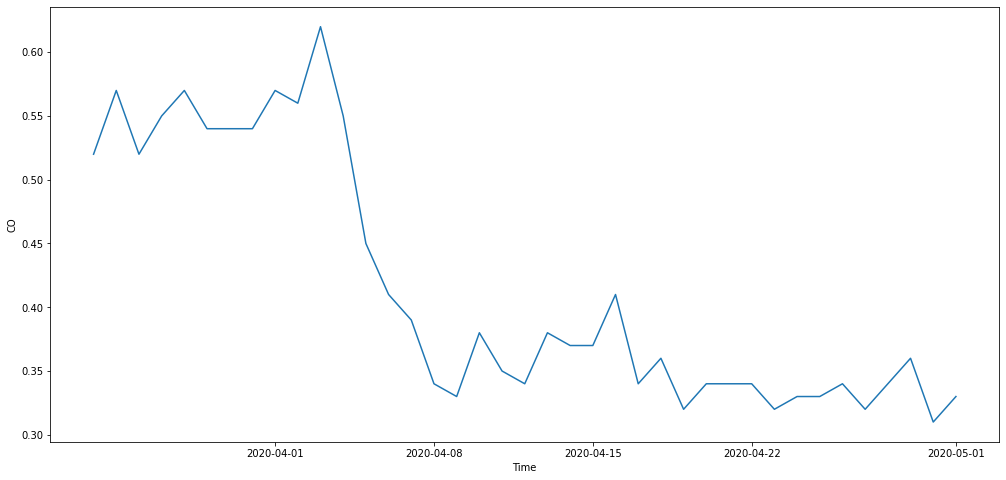

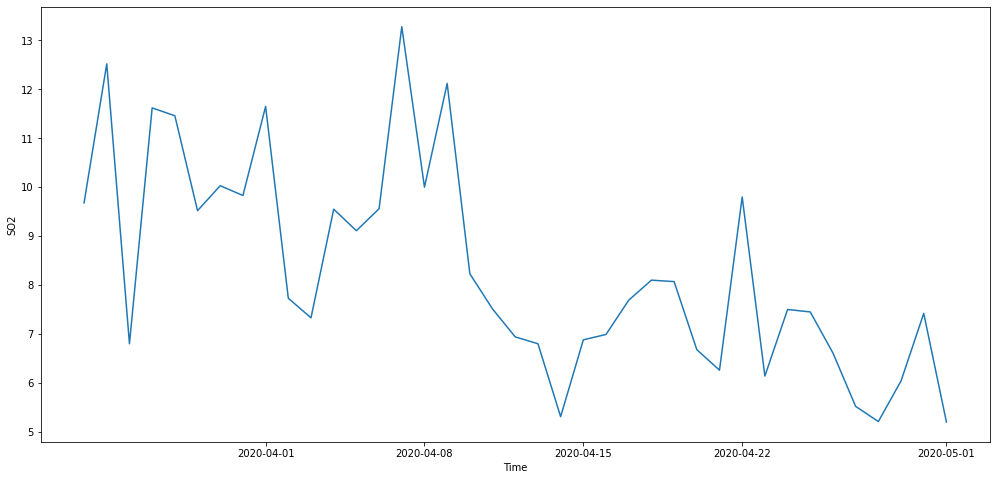

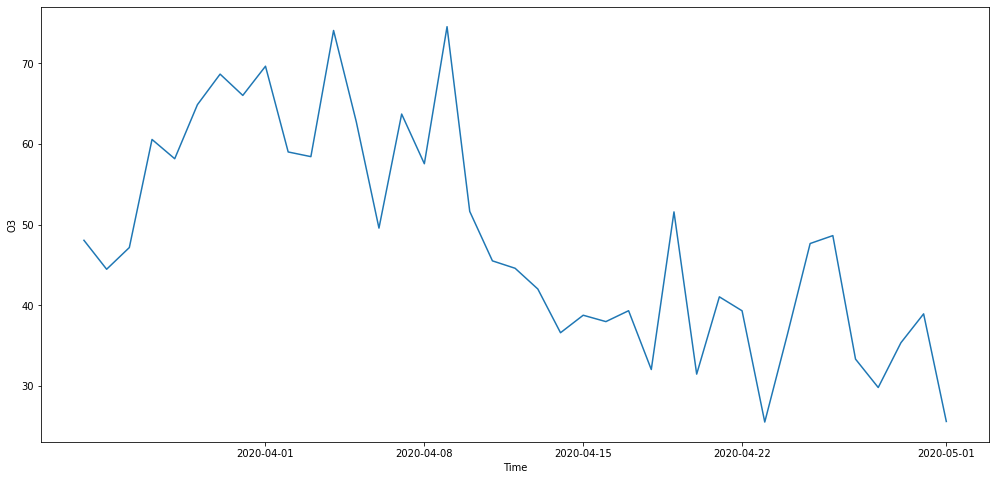

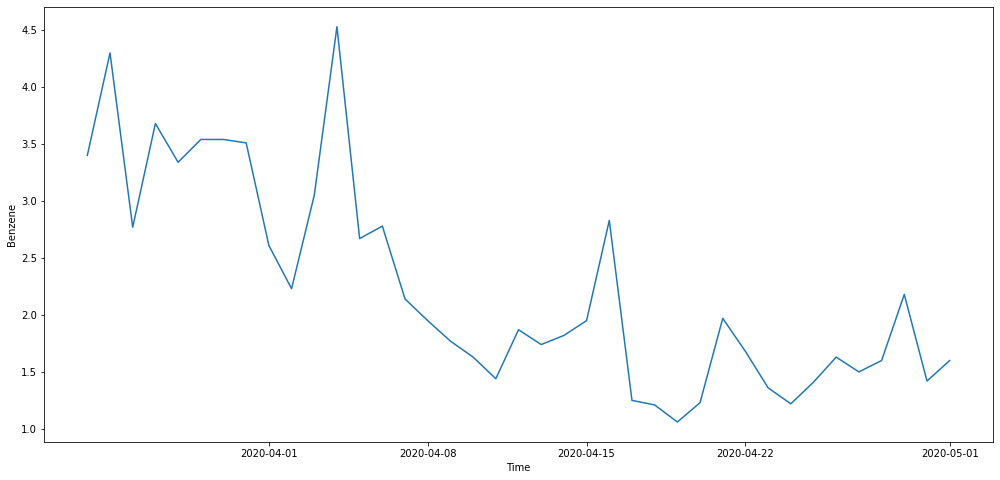

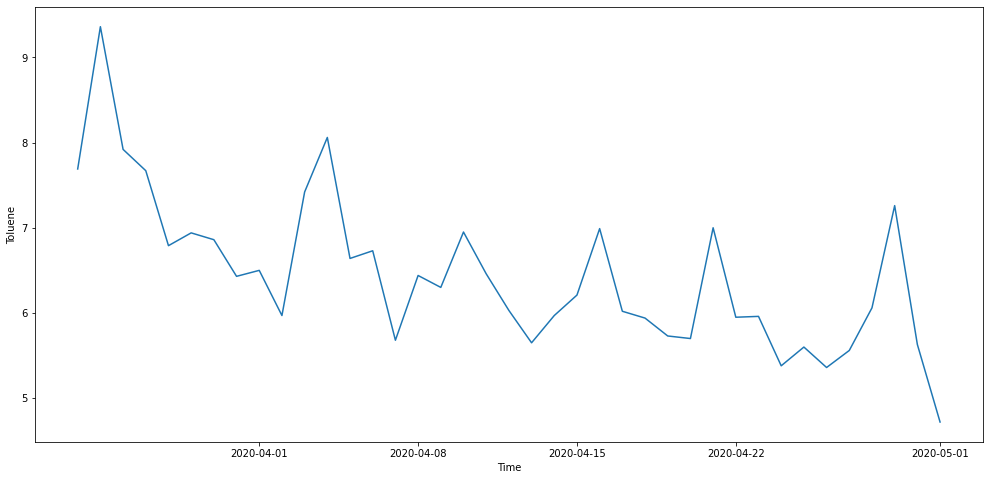

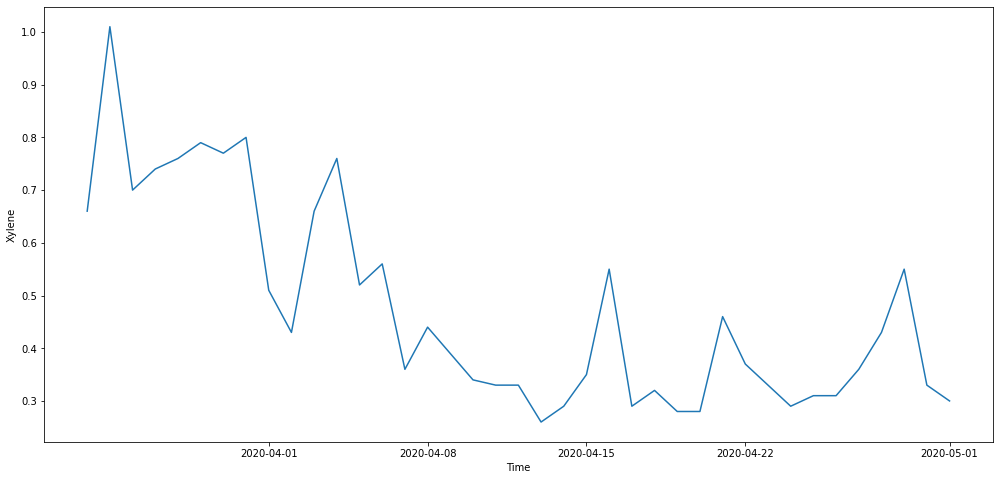

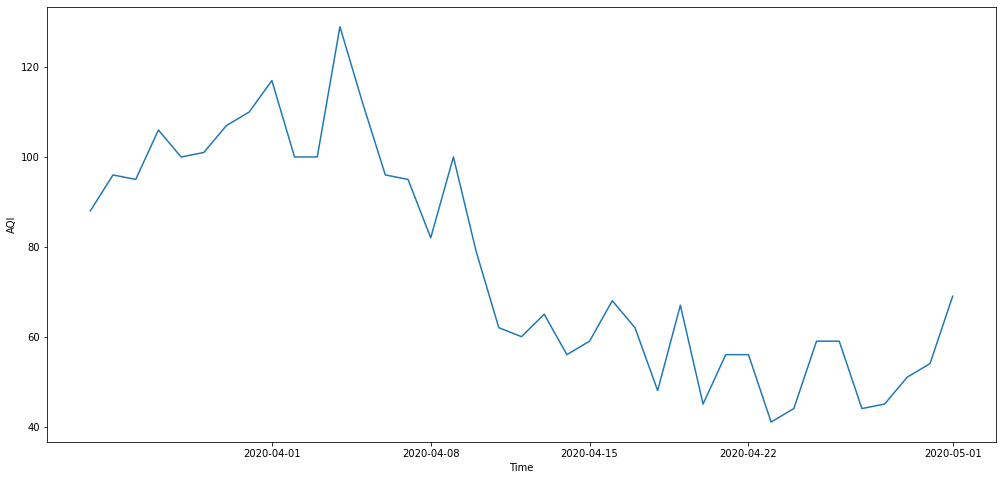

In [40]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(df_kolkata_after_covid[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in df_kolkata_after_covid.columns:
    plot_data(col)

In [41]:
df_kolkata_after_covid = df_kolkata_after_covid.reset_index()
df_kolkata_after_covid = df_kolkata_after_covid.rename({'Date':'ds','AQI':'y'} , axis = 1)
df_kolkata_after_covid.head(1)

,ds,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,y
0,2020-03-24,33.21,5.56,13.92,19.53,19.63,0.52,9.68,48.07,3.4,7.69,0.66,88.0


In [0]:
tr  = df_kolkata_after_covid

cols = tr.columns.tolist()

In [0]:
cols = ['ds',
 'y', 
 'PM2.5',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene'
 ]

In [44]:
tr_nox = tr[['ds','NOx']]
tr_nox = tr_nox.rename({'NOx':'y'},axis=1)
f1 = Prophet()
f1.fit(tr_nox)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [45]:
future1 = f1.make_future_dataframe(periods= 40 )
forecast1 = f1.predict(future1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,1.530204,-1.128175,4.439629,1.520916,1.539891,0.137670,0.137670,0.137670,0.137670,0.137670,0.137670,0.0,0.0,0.0,1.667873
75,2020-06-07,1.271557,-2.086572,3.252566,1.261889,1.281611,-0.699279,-0.699279,-0.699279,-0.699279,-0.699279,-0.699279,0.0,0.0,0.0,0.572277
76,2020-06-08,1.012909,-1.775543,3.583497,1.002840,1.023286,-0.097598,-0.097598,-0.097598,-0.097598,-0.097598,-0.097598,0.0,0.0,0.0,0.915311
77,2020-06-09,0.754262,-1.170467,3.954386,0.743748,0.764948,0.481995,0.481995,0.481995,0.481995,0.481995,0.481995,0.0,0.0,0.0,1.236257
78,2020-06-10,0.495615,-1.926869,3.457009,0.484634,0.506609,0.341408,0.341408,0.341408,0.341408,0.341408,0.341408,0.0,0.0,0.0,0.837023


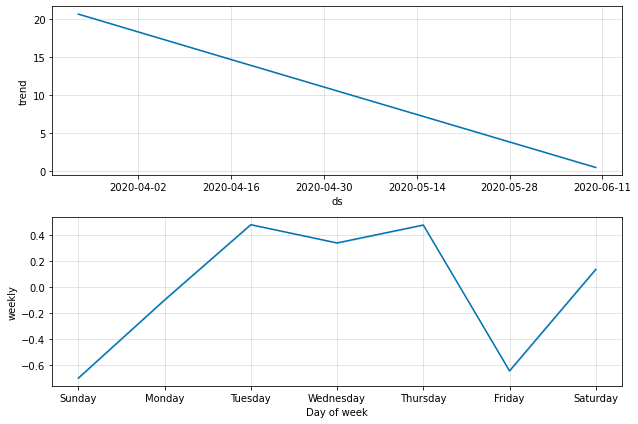

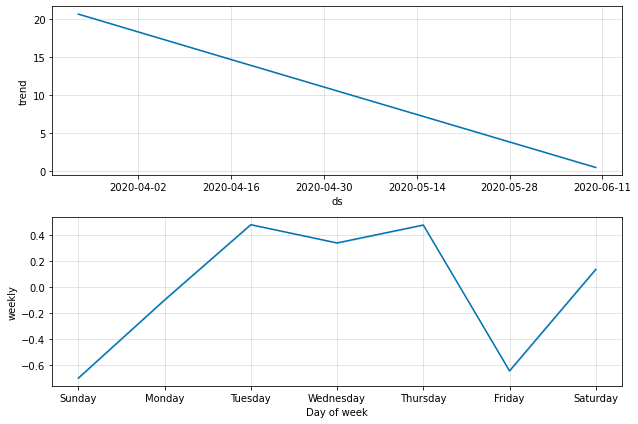

In [46]:
f1.plot_components(forecast1)

In [47]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1 = make_comparison_dataframe(tr_nox, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,21.180129,18.462690,23.745356,19.53
2020-03-25,20.779579,18.464534,23.360044,21.92
2020-03-26,20.657461,18.038969,23.332509,20.02
2020-03-27,19.274793,16.801872,21.830492,20.16
2020-03-28,19.795950,17.222373,22.502893,21.90


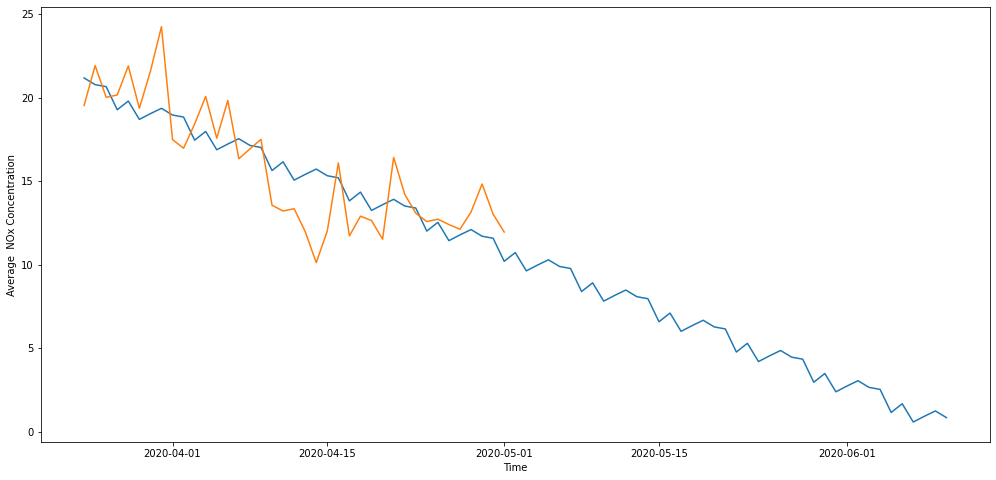

In [48]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])

plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average  NOx Concentration')
plt.grid(False)
plt.show()

**Now will do analysis for SO2 for before and after covid**

In [0]:
# before first

In [50]:
tr1_so2 = train[['ds','SO2']]
tr1_so2 = tr1_so2.rename({'SO2':'y'},axis=1)
s1 = Prophet()
s1.fit(tr1_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future1_so2 = s1.make_future_dataframe(periods= 365 )
forecast1_so2 = s1.predict(future1_so2)
forecast1_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
463,2021-03-25,8.865933,1.637611,16.171134,8.865843,8.866027,0.0,0.0,0.0,0.0,0.0,0.0,8.865933
464,2021-03-26,8.865430,0.890918,16.096788,8.865339,8.865523,0.0,0.0,0.0,0.0,0.0,0.0,8.865430
465,2021-03-27,8.864926,1.782134,16.083357,8.864835,8.865020,0.0,0.0,0.0,0.0,0.0,0.0,8.864926
466,2021-03-28,8.864422,1.726215,16.193452,8.864331,8.864516,0.0,0.0,0.0,0.0,0.0,0.0,8.864422
467,2021-03-29,8.863919,1.277420,16.036896,8.863827,8.864013,0.0,0.0,0.0,0.0,0.0,0.0,8.863919


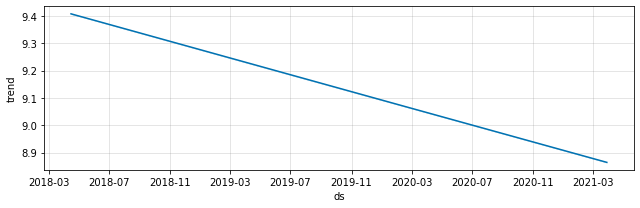

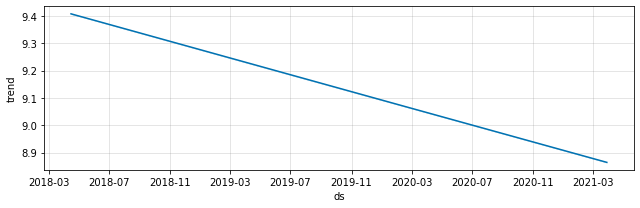

In [52]:
s1.plot_components(forecast1_so2)

In [53]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df1_so2 = make_comparison_dataframe(tr1_so2, forecast1_so2)

cmp_df1_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-04-15,9.408110,1.515851,16.468007,15.955823
2018-04-22,9.404573,1.688180,17.347649,14.988734
2018-04-29,9.401035,2.134155,17.128433,14.988734
2018-05-06,9.397497,2.138359,17.136653,14.988734
2018-05-13,9.393959,1.721743,16.818731,14.988734


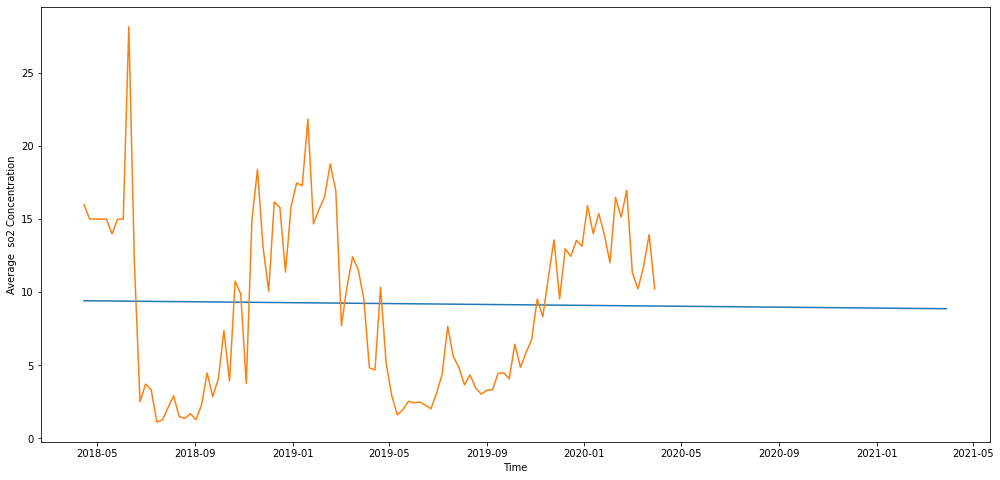

In [54]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df1_so2['yhat'])

plt.plot(cmp_df1_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()

In [0]:
# after covid

In [56]:
tr2_so2 = tr[['ds','SO2']]
tr2_so2 = tr_nox.rename({'SO2':'y'},axis=1)
s2 = Prophet()
s2.fit(tr2_so2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future2_so2 = f1.make_future_dataframe(periods= 40 )
forecast2_so2 = f1.predict(future2_so2)
forecast2_so2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
74,2020-06-06,1.530204,-1.028891,4.360512,1.520329,1.539294,0.137670,0.137670,0.137670,0.137670,0.137670,0.137670,0.0,0.0,0.0,1.667873
75,2020-06-07,1.271557,-2.132494,3.240767,1.261351,1.280974,-0.699279,-0.699279,-0.699279,-0.699279,-0.699279,-0.699279,0.0,0.0,0.0,0.572277
76,2020-06-08,1.012909,-1.777545,3.606995,1.002346,1.022846,-0.097598,-0.097598,-0.097598,-0.097598,-0.097598,-0.097598,0.0,0.0,0.0,0.915311
77,2020-06-09,0.754262,-1.435059,3.958799,0.743303,0.764394,0.481995,0.481995,0.481995,0.481995,0.481995,0.481995,0.0,0.0,0.0,1.236257
78,2020-06-10,0.495615,-1.843914,3.580120,0.484132,0.506077,0.341408,0.341408,0.341408,0.341408,0.341408,0.341408,0.0,0.0,0.0,0.837023


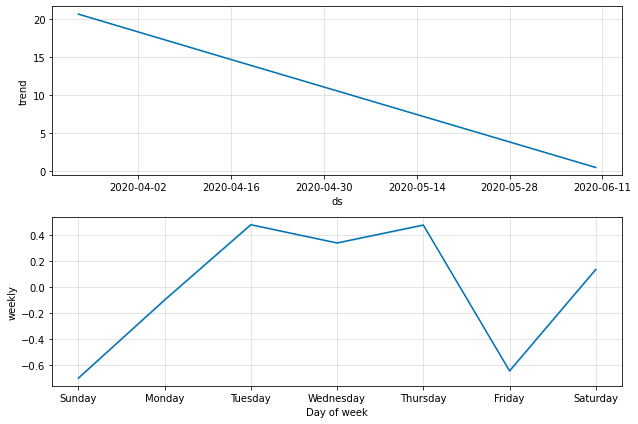

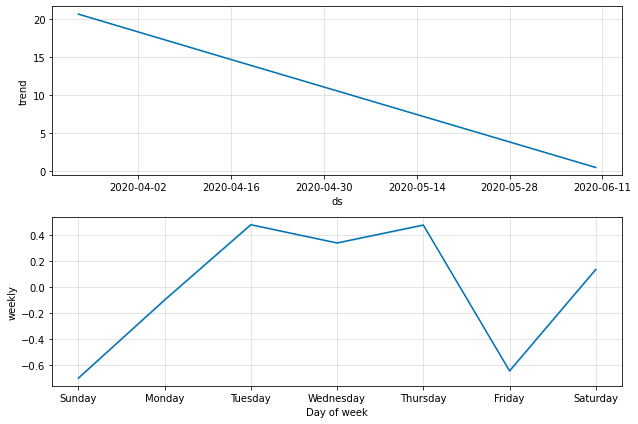

In [58]:
s2.plot_components(forecast2_so2)

In [59]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
cmp_df2_so2 = make_comparison_dataframe(tr2_so2, forecast2_so2)

cmp_df2_so2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,21.180129,18.553023,23.856246,19.53
2020-03-25,20.779579,18.150196,23.430381,21.92
2020-03-26,20.657461,17.788908,23.408319,20.02
2020-03-27,19.274793,16.812260,22.047434,20.16
2020-03-28,19.795950,17.245139,22.506635,21.90


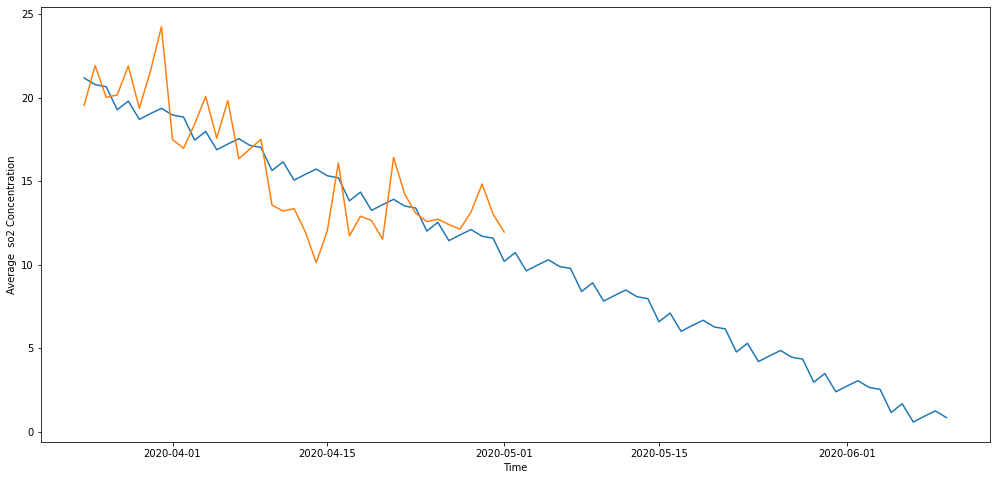

In [60]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df2_so2['yhat'])

plt.plot(cmp_df2_so2['y'])
plt.xlabel('Time')
plt.ylabel('Average  so2 Concentration')
plt.grid(False)
plt.show()